## Visualizations Tutorial

This notebook provides examples on how to carry out data visualization using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/latest/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/latest/index.html) for instructions on how to access and import the libary and its packages.

If you would like to open an editable runnable version of the tutorial click [here](https://mybinder.org/v2/gh/UchechukwuUdenze/NHS_PostProcessing/main?%2FHEAD=&urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2Ftutorial-visualizations.ipynb) to be directed to a binder platform

<mark>The Library is still under active development and empty sections will be completed in Due time</mark>

### Table of content
- [Plots](#line-plots)
- [Bounded Plots](#bounded-plots)
- [Scatter Plots](#scatter-plots)
- [Quantile Quantile Plots](#quantile-quantile-plots)
- [Flow Duration Curve](#flow-duration-curve)

 All files are available in the github repository [here](https://github.com/UchechukwuUdenze/NHS_PostProcessing/tree/main/docs/source/notebooks)

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the visualization modules from postprocessinglib.evaluation.

In this example though, I will also be importing other modules to help generate the data that I will be trying to visualize.

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, visuals

Lets use one of the data blocks from the data manipulation tutorial

In [3]:
# passing a controlled csv file for testing
!pip install openpyxl
path_output = "MESH_output_streamflow_2.csv"
path_input = "Station_data.xlsx"

DATAFRAMES = data.generate_dataframes(csv_fpath=path_output, warm_up=365,
                                      daily_agg = True, da_method = 'min',
                                      weekly_agg = True, wa_method = 'min',
                                      monthly_agg = True, ma_method = 'inst',
                                      yearly_agg = True, ya_method = 'sum',
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
                                      long_term = True, lt_method = ["mean" ,'q75' ,'Q25', 'q10', 'q90'],)
Stations = pd.read_excel(io=path_input)

ignore = []
for i in range(0, len(Stations)):
    if Stations['Properties'][i] == 'X':
        ignore.append(i)

Stations = Stations.drop(Stations[Stations['Properties'] == 'X'].index)
Stations = Stations.set_index('Station Number')

for i in reversed(ignore):
        DATAFRAMES["DF_OBSERVED"] = DATAFRAMES["DF_OBSERVED"].drop(columns = DATAFRAMES['DF_OBSERVED'].columns[i])
        DATAFRAMES['DF_SIMULATED']  = DATAFRAMES["DF_SIMULATED"].drop(columns = DATAFRAMES['DF_SIMULATED'].columns[i])
        for key, dataframe in DATAFRAMES.items():
            if key != "DF_SIMULATED" and key != "DF_OBSERVED":
                DATAFRAMES[key] = dataframe.drop(columns = dataframe.columns[[2*i, 2*i+1]])
            

# for key, value in DATAFRAMES.items():
#     print(f"{key}:\n{value.head}")

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02


Now that we have our data, let's jump right in!

### LINE PLOTS

Starting off simple - one of the most important plots when working with hydrology and flow forecasting is the line plot of stream flow, stage or discharge.
Using the data generated above we can plot these using our plot function.
We are able to plot just single line data - 

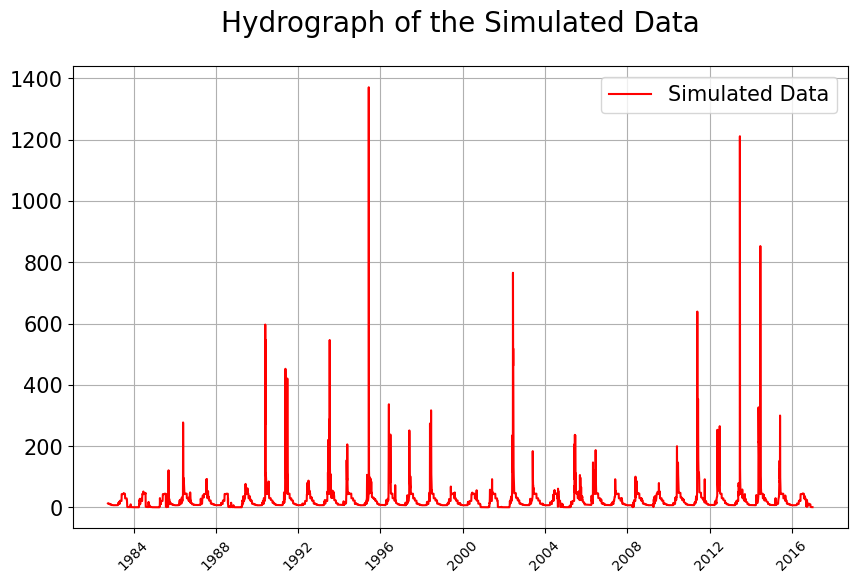

In [4]:
# A very simple line plot can be generated as shown below
# Just plotting the simulated data from the first station
visuals.plot(
    df = DATAFRAMES["DF_SIMULATED"].iloc[:, [0]],
    title='Hydrograph of the Simulated Data',
    grid=True,
)

...and combined observed and simulated data - 

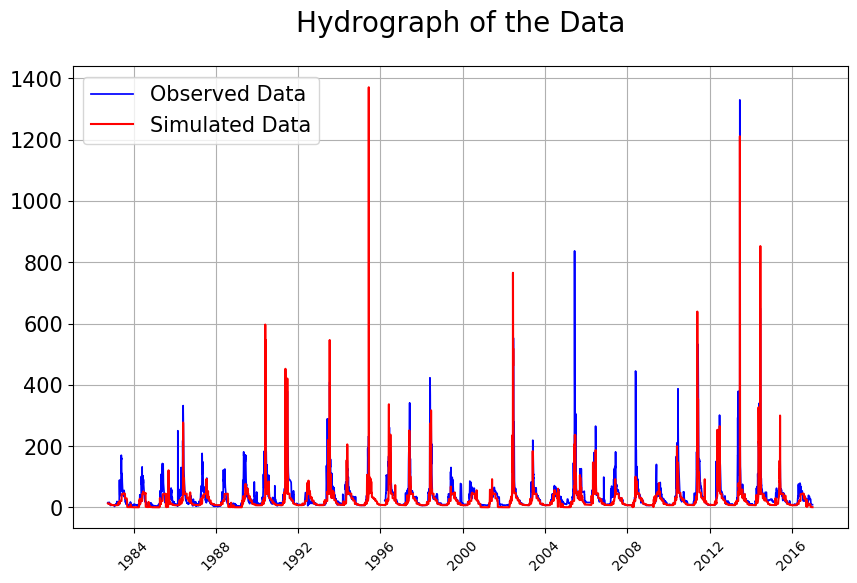

In [5]:
# Plotting both Observed and Simukated combined
visuals.plot(
    merged_df = DATAFRAMES["DF"].iloc[:, [0, 1]],
    title='Hydrograph of the Data',
    grid=True,
)

Lets zoom into a few years, say 2000-2005

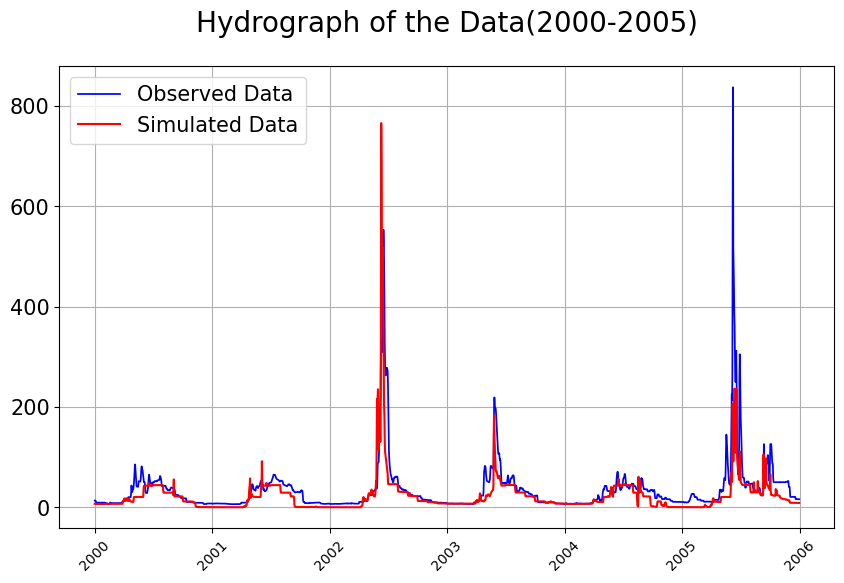

In [6]:
visuals.plot(
    merged_df = DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1]],
    title='Hydrograph of the Data(2000-2005)',
    grid=True,
)

We are also able to plot the observed and simulated data in cases where we are not able to obtain them already merged together. This way we are not limited to a merged dataframe. This is shown below:

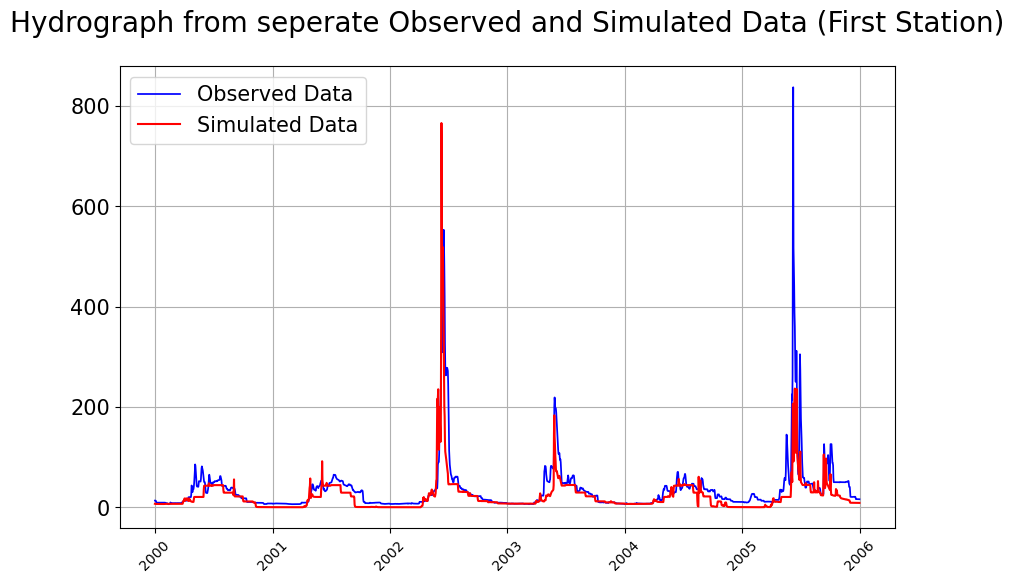

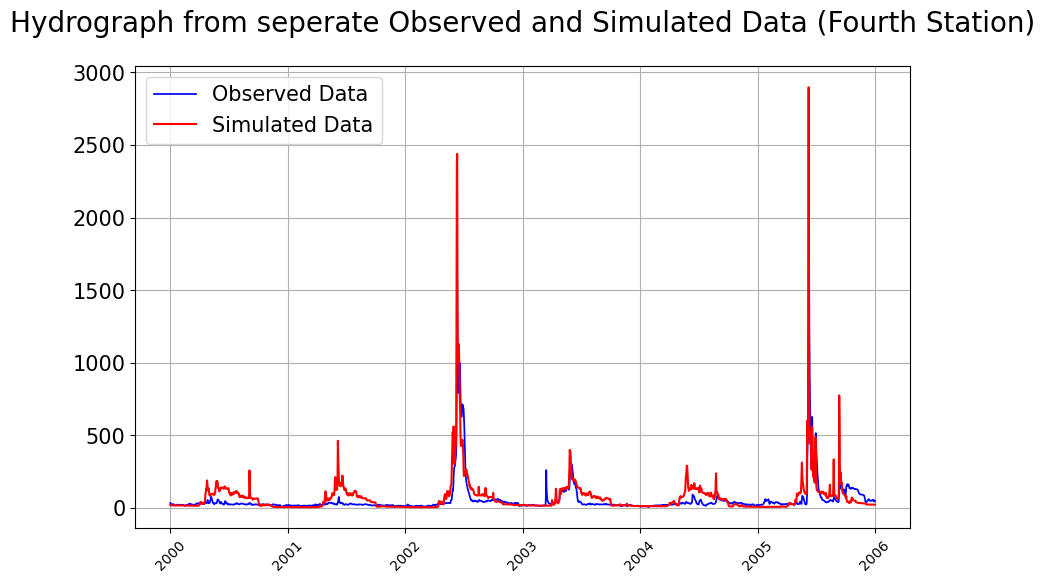

In [7]:
# plotting the first and fourth stations..
visuals.plot(
    sim_df = DATAFRAMES["DF_SIMULATED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 3]],
    obs_df = DATAFRAMES["DF_OBSERVED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 3]],
    title=['Hydrograph from seperate Observed and Simulated Data (First Station)',
           'Hydrograph from seperate Observed and Simulated Data (Fourth Station)'],
    grid=True,
)

The plot function also gives us complete control of the plot parameters. It allows you the flexibility to change the line colors, line width, axis labels, add grid lines, each plots title, the line legends and much more. There also exists an option to save the files as png images each with its own distinct name! 

All the posibilities can be found over at the documentation website linked [here](https://nhs-postprocessing.readthedocs.io/en/latest/api/postprocessinglib.evaluation.visuals.plot.html#postprocessinglib.evaluation.visuals.plot). Some examples of these are shown below:

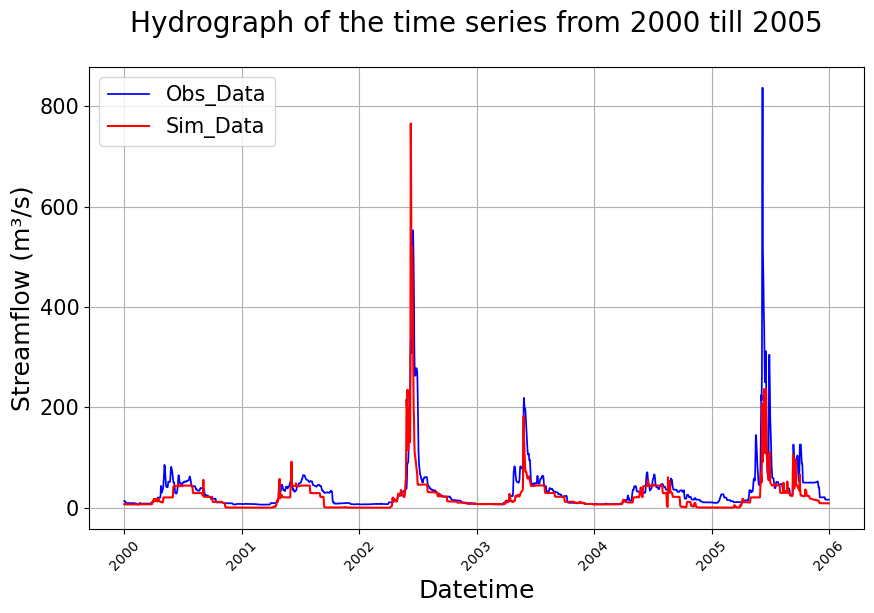

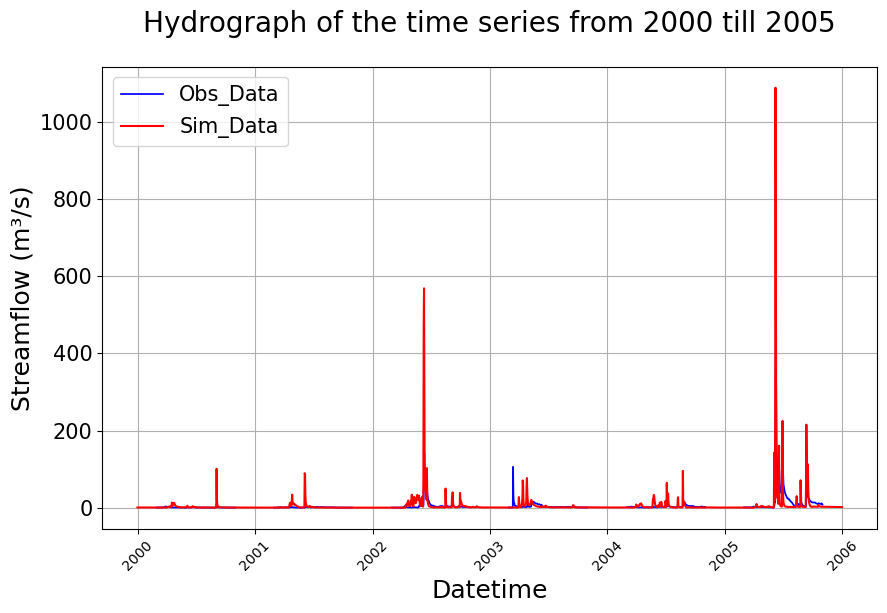

In [8]:
# Changing the default naming conventions
visuals.plot(
    merged_df =DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 2, 3]],
    title='Hydrograph of the time series from 2000 till 2005',
    linestyles=('r-', 'b-'),
    legend=('Sim_Data', 'Obs_Data'),
    labels=('Datetime', 'Streamflow'),
    grid=True,
    )

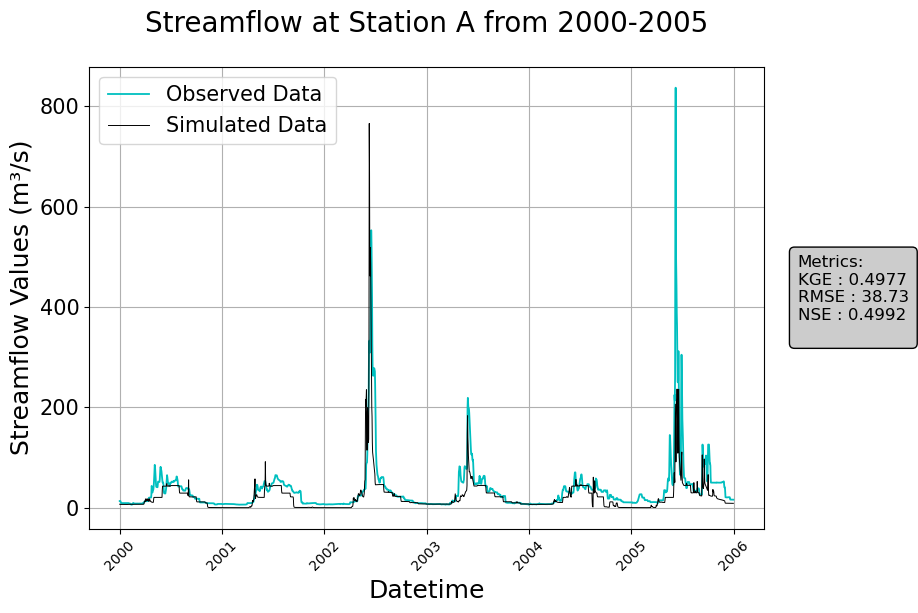

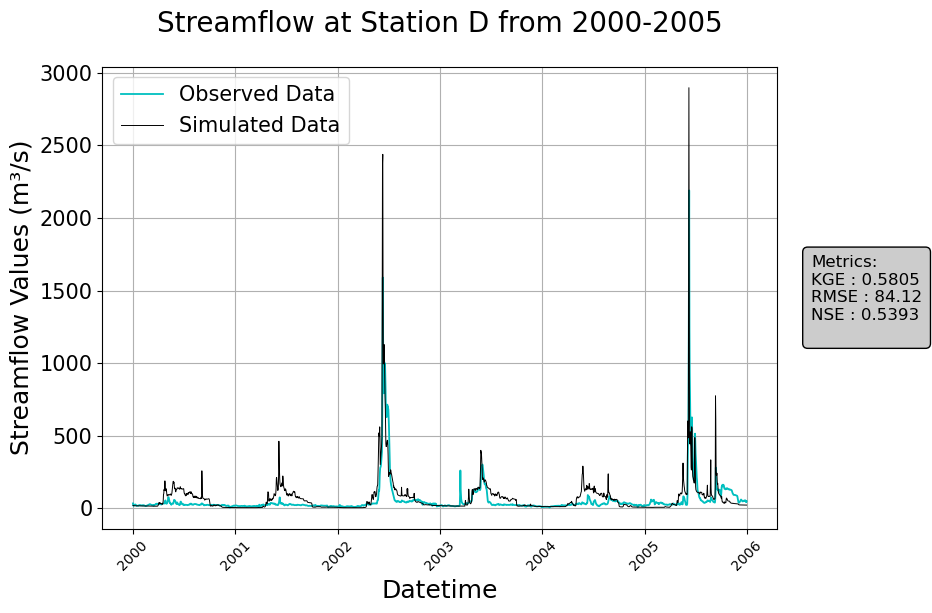

In [9]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df =DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 6, 7]],
    # including multiple plot titles
    title=['Streamflow at Station A from 2000-2005', 'Streamflow at Station D from 2000-2005'],
    fig_size=(10, 6),
    linestyles=['k-', 'c-'],
    labels=['Datetime', 'Streamflow Values'],
    linewidth=(0.7, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE'],
    grid=True,
    # To save, uncomment the two lines below
    # save = True, 
    # save_as = [station_a(2000-2005), station_b(2000-2005)],
    # The two images will be saved as png files with names as entered above in the current directory
    )

### BOUNDED PLOTS

Another really important plot is the bounded plot. The bounded plot is much like the line plot except it allows you to compare not just exact values but also the range of values. Within the MESH models evaluations, we use this when aggregating the data into days of the month, months of the year, etc. Its especially useful when trying to guage how accurate the range of values compared to say its median or mean for example. An exmaple is shown below

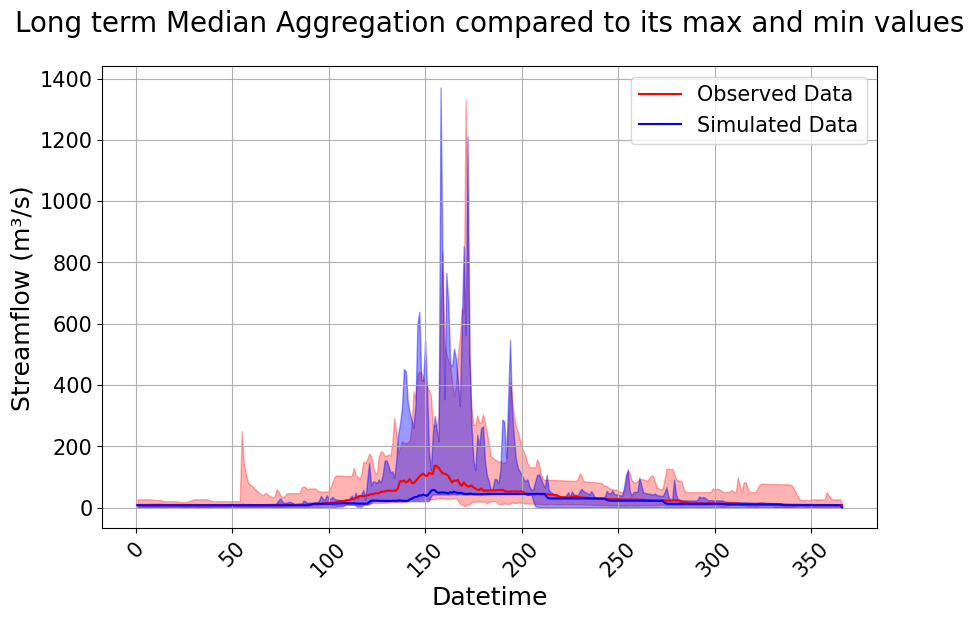

In [10]:
visuals.bounded_plot(
    lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [0,1]],
    upper_bounds = [DATAFRAMES["LONG_TERM_MAX"].iloc[:, [0,1]]],
    lower_bounds = [DATAFRAMES["LONG_TERM_MIN"].iloc[:, [0,1]]],
    linestyles=['b', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = 'Long term Median Aggregation compared to its max and min values'
    )

As you can see above, we compare the median of the long term aggregation to its max and min values. Below, lets compare it to the 25th and 75th Quartile values

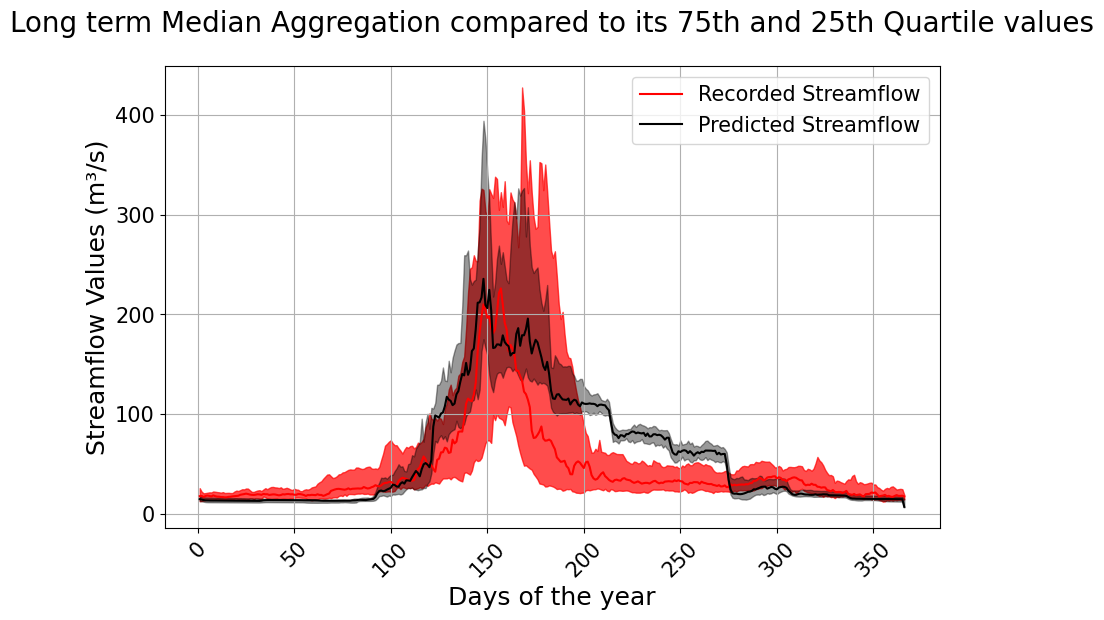

In [11]:
visuals.bounded_plot(
  lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [6,7]],
  upper_bounds = [DATAFRAMES["LONG_TERM_Q75"].iloc[:, [6,7]]],
  lower_bounds = [DATAFRAMES["LONG_TERM_Q25"].iloc[:, [6,7]]],
  title=['Long term Median Aggregation compared to its 75th and 25th Quartile values'],
  legend = ['Predicted Streamflow','Recorded Streamflow'],
  linestyles=['k', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.7],
  grid = 'True'
#   To save, uncomment the two lines below
#   save = True,
#   save_as = "b_plot_1", dir= '../b_plots'
)

We can also use multiple bounds.

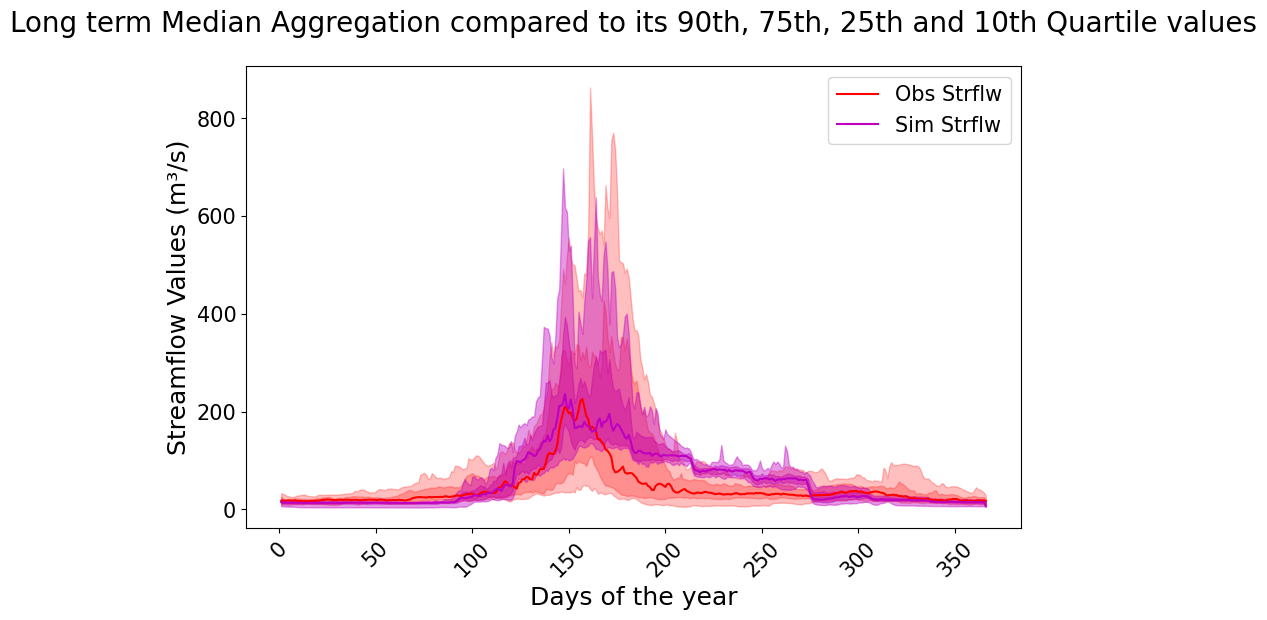

In [12]:
visuals.bounded_plot(
  lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [6,7]],
  upper_bounds = [DATAFRAMES["LONG_TERM_Q75"].iloc[:, [6,7]], DATAFRAMES["LONG_TERM_Q90"].iloc[:, [6,7]]],
  lower_bounds = [DATAFRAMES["LONG_TERM_Q25"].iloc[:, [6,7]], DATAFRAMES["LONG_TERM_Q10"].iloc[:, [6,7]]],
  title=['Long term Median Aggregation compared to its 90th, 75th, 25th and 10th Quartile values'],
  legend = ['Sim Strflw','Obs Strflw'],
  linestyles=['m-', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.25],
)

### SCATTER PLOTS

The library provides us with two types of scatter plots. You select the one you want based on the inputs you pass into it. 

The first kind directly compares simulated or predcicted data (i.e., data generated by using the models) to actual oberved or measure data. It is used to visually show how accurately the model predicts the data. The closer the points are to the 45 degree line the more accurate the model is. Its is also used to show areas and time periods where the data does better which might point to a different problem such as weather anomalies, instrument errors, etc.

An example is shown below

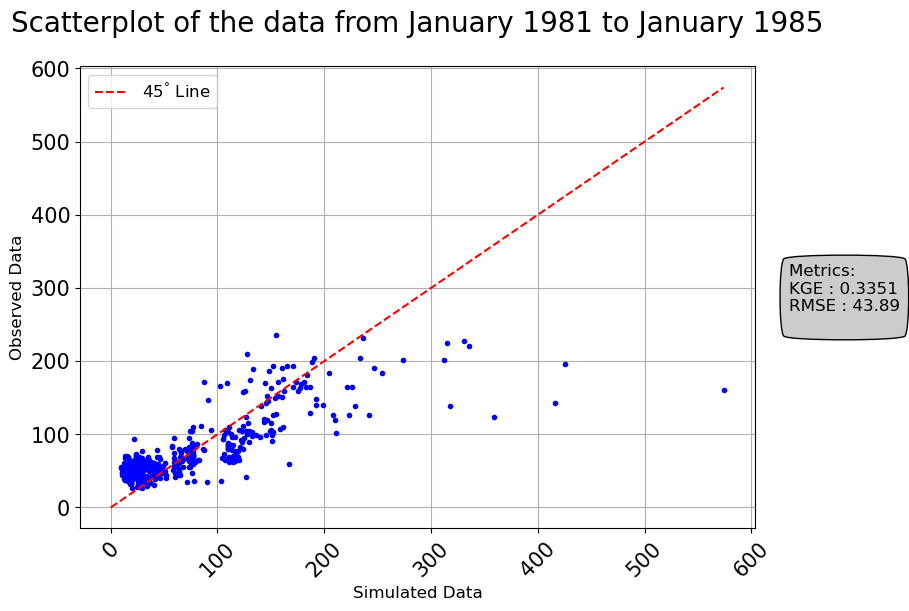

In [13]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'].iloc[:, [26, 27]],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = 'b.',
               title = "Scatterplot of the data from January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
#                save = True,
               )

Similar to the other plots, there's ways to save the images using the save, save as and dir parameters passed into the function. It also allows the calculations of metrics as shown above. 

Another way to use the function would be using to show variations in certain metrics to show where the models performs better for that particular metric. You will have to provide some sort of shapefile and the parameters you'd need to plot it like x and y axis values, and the metric you'd be comparing. 

An example is shown below:

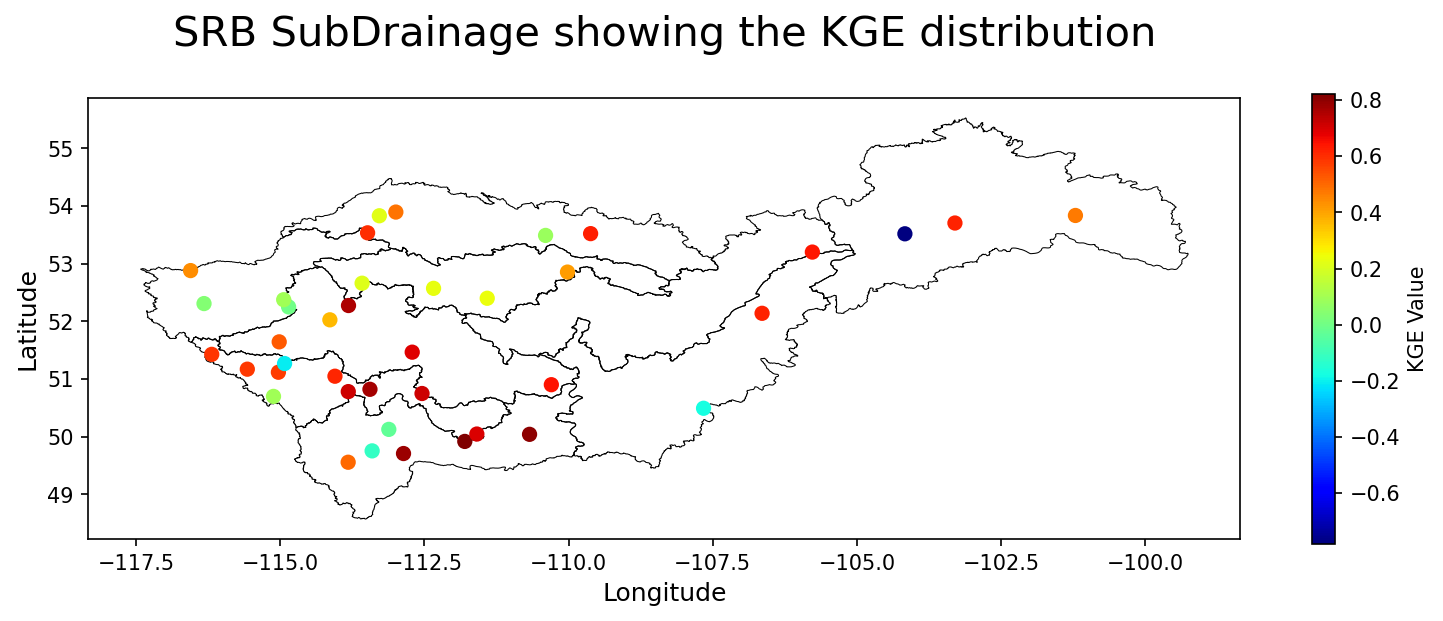

In [14]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "SRB SubDrainage showing the KGE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "KGE",
    fig_size = (24, 30),
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = DATAFRAMES["DF_SIMULATED"],
    labels=['Longitude', 'Latitude'],
#     cmap = 'viridis',
#     vmin = 0,
#     vmax=0.8,
)

The graph above shows the location of various stations and how accurately the models predict the streamflow by using the KGE (Kling - Gupta Efficiency) metric. You are also allowed to change the color scheme of your cmap, the maximum and minimum values of your color map and just like the ones above, you can also save using the respective parameters like the above visualizations tools.

### QUANTILE QUANTILE PLOTS

### FLOW DURATION CURVE